<a href="https://www.kaggle.com/code/moe5998/car-price-prediction-eda-ml-regression-models?scriptVersionId=114029852" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [7]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
df['ID'].duplicated().sum()

313

***We have 313 duplicates in the data***

In [9]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

***We have unlogic value '-'***

In [10]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

***Mileage column mixed between object and numerical***

In [11]:
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

***Engine volume column mixed between object and numerical***


In [12]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

***The values must be 2-3, 4-5, >5.***

# Data preprocessing

In [13]:
df.drop('ID', axis=1, inplace=True)

In [14]:
df['Levy']= pd.to_numeric(df['Levy'], errors='coerce')

***Fix Levy column, convert all non numirical values to nan***

In [15]:
df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]

***Fix Mileage column, get numerical values only***

In [16]:
df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]

***Fix Engine volume column, get numerical values only***

In [17]:
df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

***Convert 02-Mar to 2-3, and 04-May to 4-5***

# Exploring Data Analysis

<AxesSubplot:xlabel='Levy', ylabel='Density'>

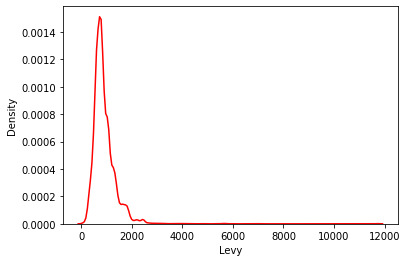

In [18]:
sns.kdeplot(df['Levy'], color='r')

***Most values between more than 0 and less than 2000***

Text(0.5, 1.0, '# of each Category')

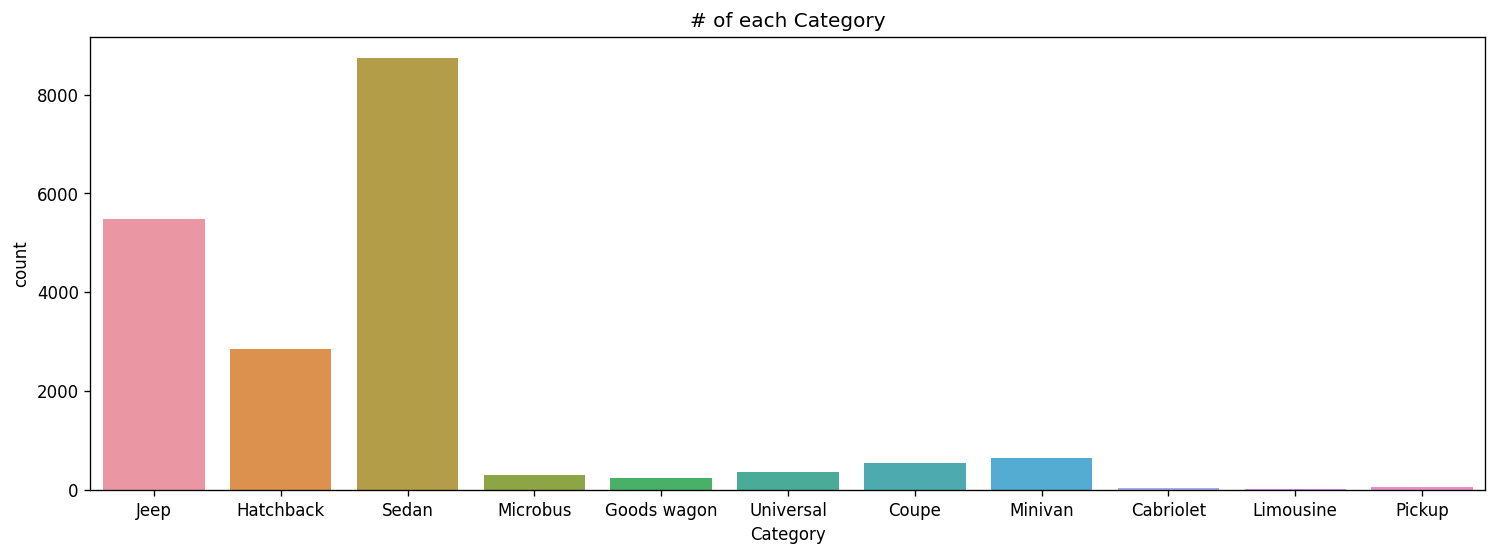

In [19]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("# of each Category")

***Most types of Categories are Sedan, Hatchback, and Jeep.***


<AxesSubplot:xlabel='Airbags', ylabel='Density'>

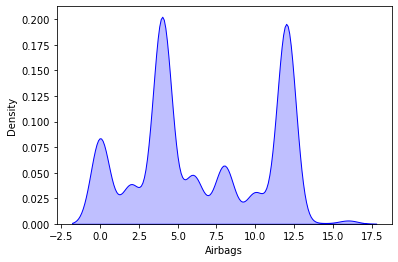

In [20]:
sns.kdeplot(df['Airbags'], color='b', shade=True)

***Most cars have 3 to 5 airbags or 13 airbags***


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

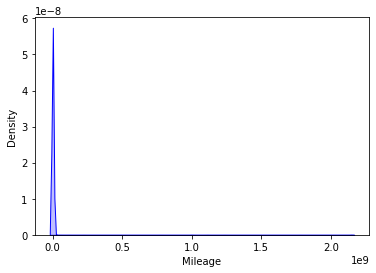

In [21]:
sns.kdeplot(df['Mileage'], color='b', shade=True)

***Mileage for most cars are 0.0 (most cars are new)***

<AxesSubplot:xlabel='Prod. year', ylabel='Count'>

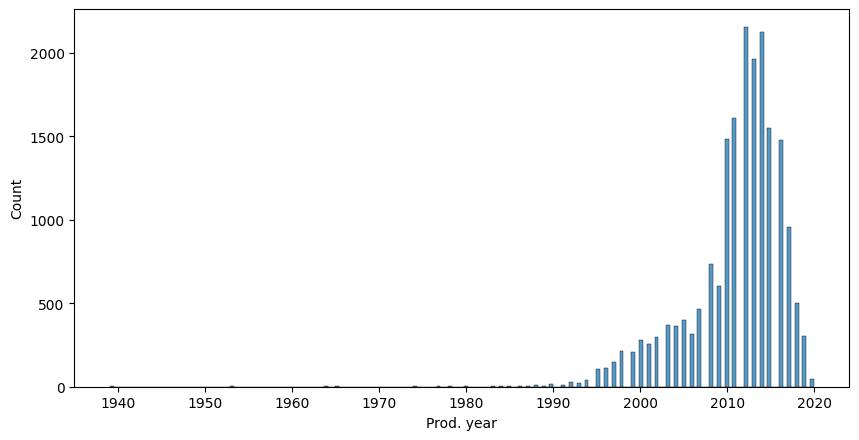

In [22]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

***Most cars are between (2010 - 2020), but we have some very old cars***

<AxesSubplot:xlabel='Engine volume', ylabel='Density'>

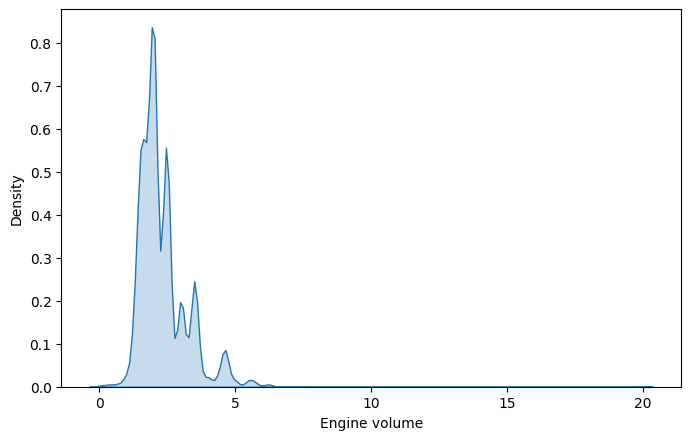

In [23]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'], shade = True)

***Most Engine valume in range (1 to 5)***

Text(0.5, 1.0, '# of colors')

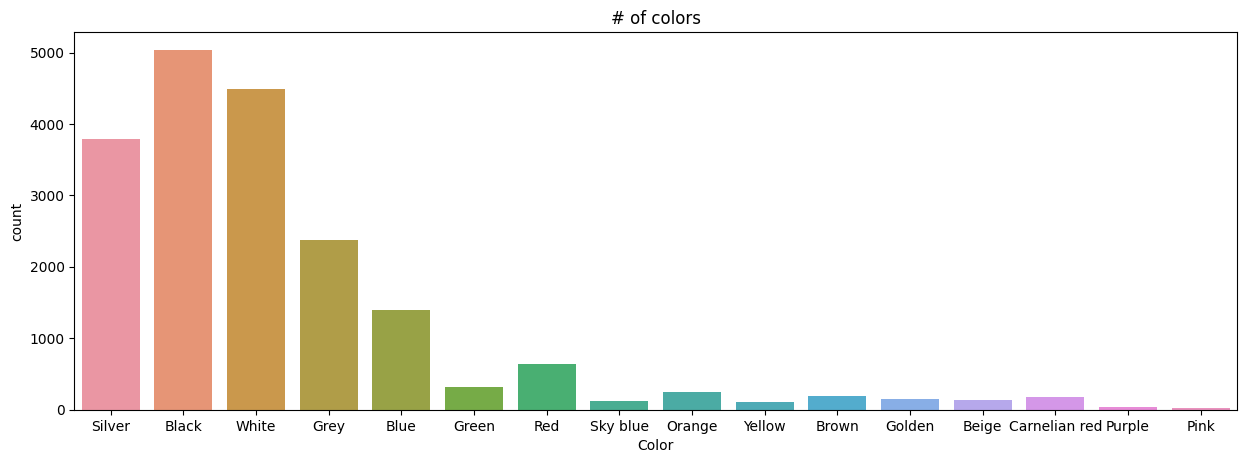

In [24]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Color')
plt.title("# of colors")

<AxesSubplot:xlabel='Doors', ylabel='count'>

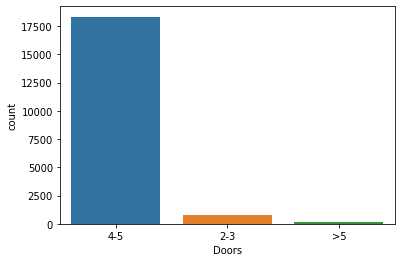

In [25]:
sns.countplot(data=df, x='Doors')

***Most cars in the category 3-4***

<AxesSubplot:xlabel='Price', ylabel='Levy'>

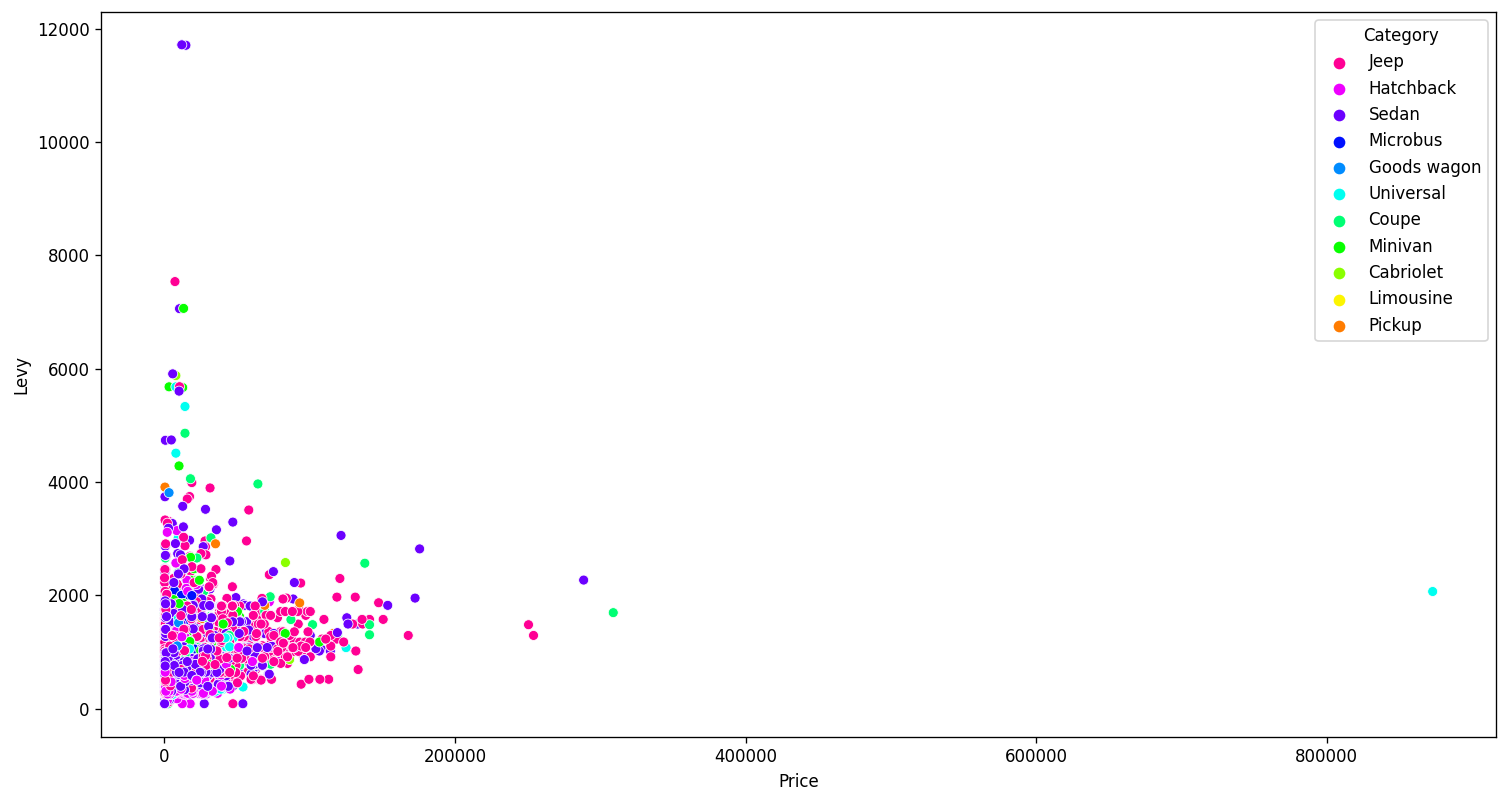

In [26]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Category", palette="hsv_r")

***Jeep cars are expensive, while Hatchback and Microbus are not expensive, Universal is not expensive but has a high levy. We can notice there are unlogic plots like high price with low levy and low price with a very high levy that an outliers (we fix it later).***

<AxesSubplot:xlabel='Price', ylabel='Levy'>

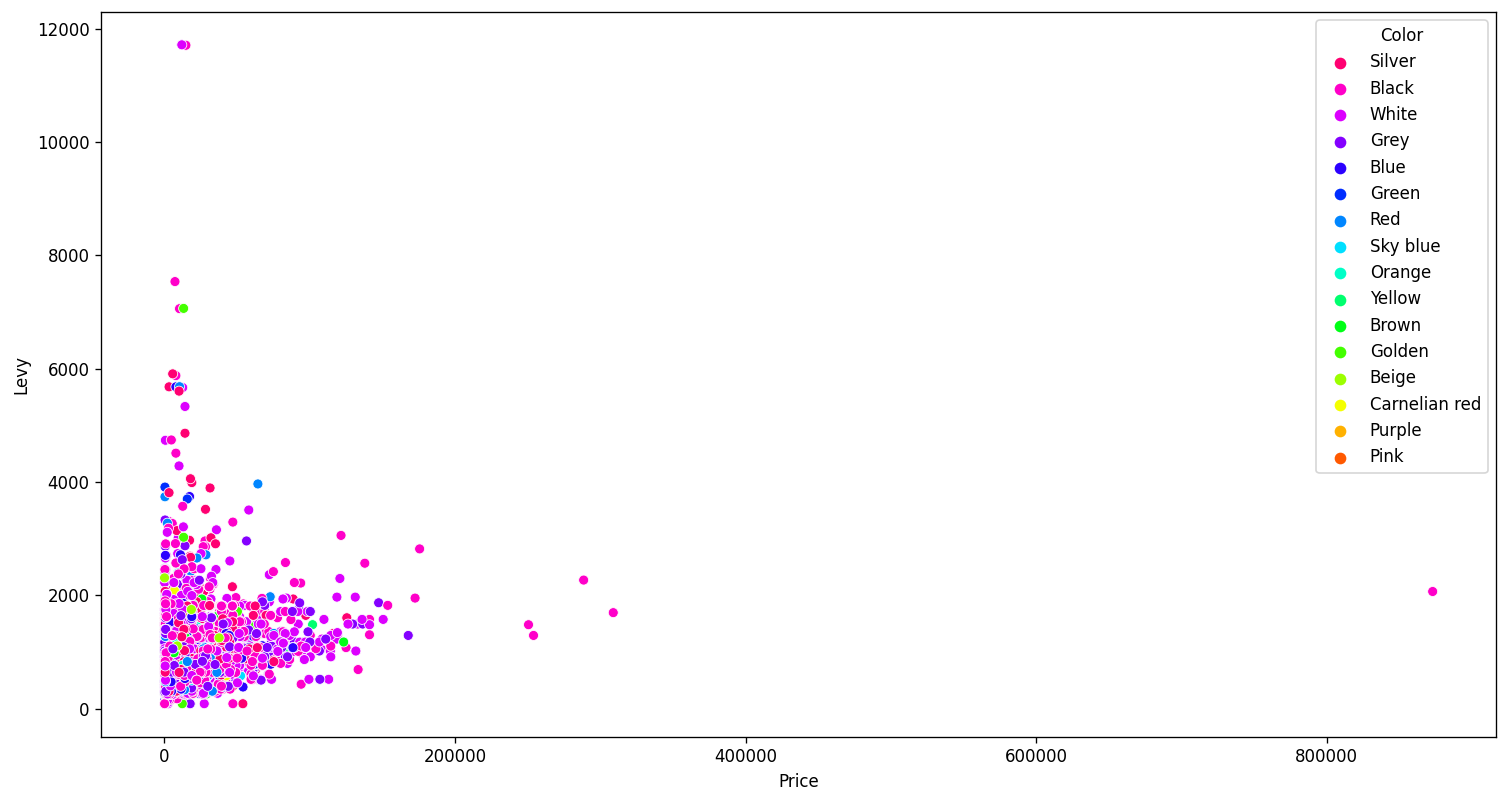

In [27]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Color", palette="hsv_r")

***Color doesn't affect on car's price***

# Continue data preprocessing

<AxesSubplot:>

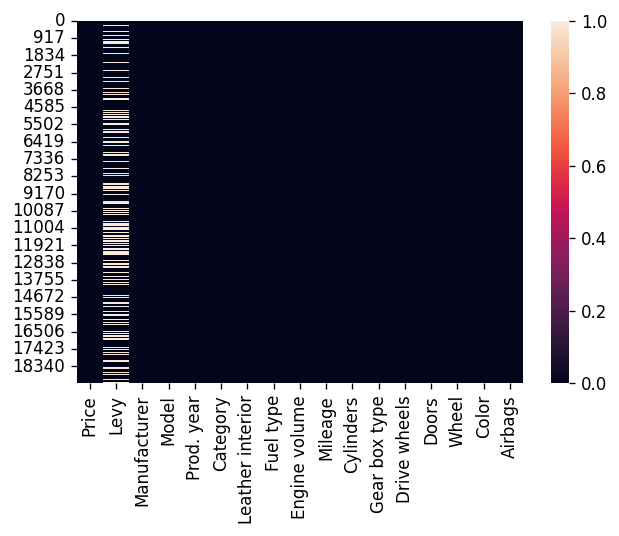

In [28]:
plt.figure(dpi=120)
sns.heatmap(df.isna())

***30% of Levy values are NaN***

In [29]:
df.drop_duplicates(inplace=True)

***Drop dublicates***

In [30]:
df = df[df['Price'] > 500]

***we have unlogic price values becaouse w have new cars with price less than 500 so we ignored this values***

In [31]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,14799.0,2.153406e+04,2.170679e+05,549.0,8500.0,15367.0,24123.0,2.630750e+07
Levy,9461.0,8.763433e+02,4.591725e+02,87.0,640.0,779.0,1017.0,1.171400e+04
Prod. year,14799.0,2.010491e+03,5.954657e+00,1943.0,2008.0,2012.0,2014.0,2.020000e+03
Engine volume,14799.0,2.207203e+00,7.982323e-01,0.0,1.7,2.0,2.5,2.000000e+01
Mileage,14799.0,1.720727e+06,5.148377e+07,0.0,66895.5,120345.0,180000.0,2.147484e+09
Cylinders,14799.0,4.471789e+00,1.127318e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,14799.0,6.448206e+00,3.997651e+00,0.0,4.0,5.0,10.0,1.600000e+01


<AxesSubplot:xlabel='Levy', ylabel='Density'>

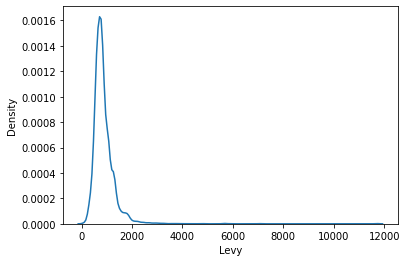

In [33]:
sns.kdeplot(df['Levy'])

In [34]:
df['Levy'].fillna(df['Levy'].median(), inplace=True)

<AxesSubplot:xlabel='Levy', ylabel='Density'>

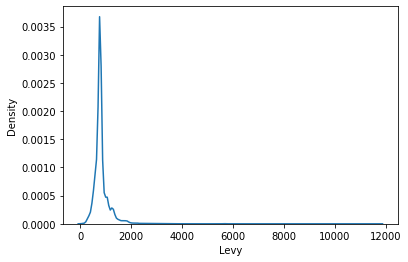

In [35]:
sns.kdeplot(df['Levy'])

***We filled missing data by median***

In [36]:
# Handling outliers by replace it by lower and upper bounds
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data


# Get Continus Columns
def get_continus_columns(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst

In [37]:
df_with_outliers = df.copy()

In [38]:

df = handling_outliers(df, get_continus_columns(df))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


***Handling outliers***

In [39]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

***Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)***

# Build ML Modul

In [40]:
x = df.drop(['Price'], axis=1).values
y = df['Price'].values
x = MinMaxScaler().fit_transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [42]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)
xgb = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
cb  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

Linear Regression : 38 %
K Nearest Neighbours : 63 %
Decision Tree : 49 %
Random Forest : 77 %
AdaBoost : 45 %
Gradient Boosting Regressor : 78 %
XGBRegressor : 78 %
CatBoostRegressor : 79 %


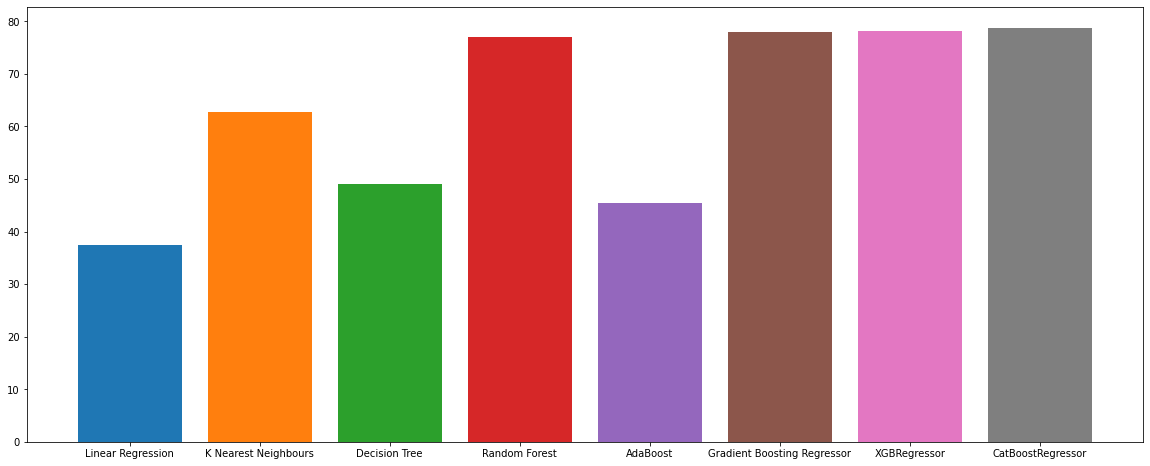

In [43]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

***The CatBoostRegressor model has the best accurecy (79%) without polynomial***

###  Polynomial (Degree= 2)

In [44]:
poly = PolynomialFeatures(degree=2)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

Linear Regression : 57 %
K Nearest Neighbours : 63 %
Decision Tree : 53 %
Random Forest : 76 %
AdaBoost : 51 %
Gradient Boosting Regressor : 78 %
XGBRegressor : 78 %
CatBoostRegressor : 79 %


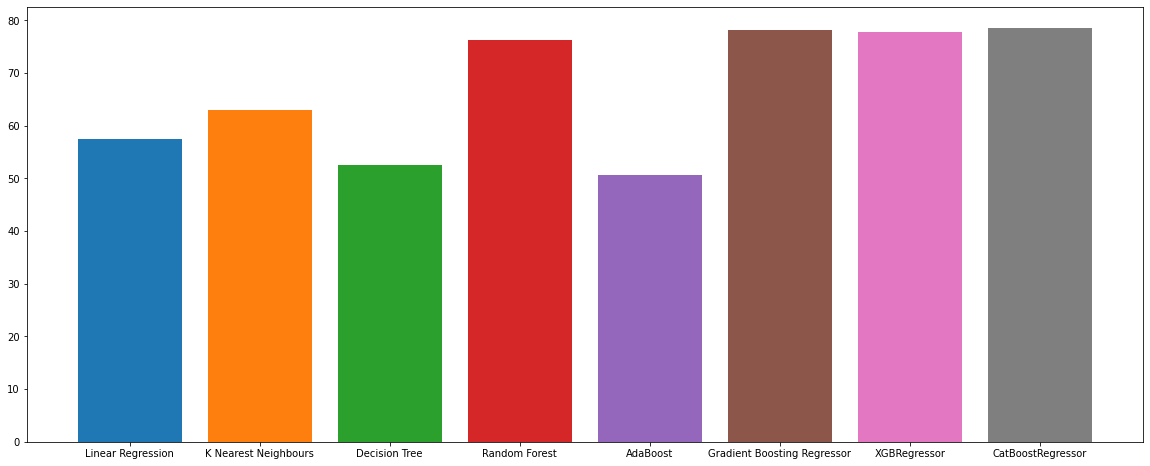

In [45]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train_trans, y_train)    
  
    y_pred = regressor.predict(x_test_trans)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

***Using polynomial affect on some models but The CatBoostRegressor model has the best accurecy (79%)***